#### read dataset

In [1]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import os

In [2]:
df = pd.read_csv("dataset\stroke.csv")
print("Dataset Loaded!")
df = df.drop("id", axis=1)
df.head()

Dataset Loaded!


<>:1: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:1: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
C:\Users\Bagas\AppData\Local\Temp\ipykernel_11540\2984943672.py:1: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
  df = pd.read_csv("dataset\stroke.csv")


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [4]:
df.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df = df.dropna()
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [7]:
# from sklearn.preprocessing import LabelEncoder

# encoders = {}
# for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
#     le = LabelEncoder()
#     le.fit(df[col])
#     encoders[col] = le

# fitur_train = df.drop('stroke', axis=1).columns.tolist()

# # Simpan ini agar nanti bisa dipakai di API
# import pickle
# with open("models/encoders.pkl", "wb") as f:
#     pickle.dump({"columns": fitur_train, "encoders": encoders}, f)

# for column in df.columns:
#     if df[column].dtype == 'object':
#         le = LabelEncoder()
#         df[column] = le.fit_transform(df[column])
# df.head()

In [8]:
# skew_values = df.skew()
# print("Skewness tiap kolom:")
# print(skew_values)

In [9]:
df["stroke"].value_counts()

stroke
0    4700
1     209
Name: count, dtype: int64

#### var inden dan depen

In [10]:
x = df.drop("stroke", axis=1)
y = df.iloc[:, -1]


y.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [11]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


#### split data test dan train

In [12]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
# from imblearn.over_sampling import SMOTE

# # Split test set seimbang
# kelas_0 = df[df['stroke'] == 0]
# kelas_1 = df[df['stroke'] == 1]

# n_test = 50
# test_0 = kelas_0.sample(n=n_test, random_state=42)
# test_1 = kelas_1.sample(n=n_test, random_state=42)
# test_set = pd.concat([test_0, test_1])

# train_set = df.drop(test_set.index)

# # Pisahkan fitur dan stroke
# x_train = train_set.drop('stroke', axis=1)
# y_train = train_set['stroke']
# x_test = test_set.drop('stroke', axis=1)
# y_test = test_set['stroke']

# # SMOTE pada train set
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(x_train, y_train)


In [13]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in x_train.columns:
    if x_train[col].dtype == "object":
        le = LabelEncoder()

        # Fit TRAIN
        x_train[col] = le.fit_transform(x_train[col])

        # Test TRANSFORM
        x_test[col] = le.transform(x_test[col])

        encoders[col] = le


# Encoder untuk API
fitur_train = x_train.columns.tolist()

with open("models/encoders.pkl", "wb") as f:
    pickle.dump({"columns": fitur_train, "encoders": encoders}, f)

print("\nEncoder berhasil disimpan!")



Encoder berhasil disimpan!


In [14]:
from imblearn.combine import SMOTEENN
x_train_res, y_train_res = SMOTEENN().fit_resample(x_train, y_train)


In [15]:
y_test

4020    0
2170    0
2822    0
4759    0
1437    0
       ..
2819    0
1478    0
3704    0
762     0
5068    0
Name: stroke, Length: 982, dtype: int64

In [16]:
x_train.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
1473,1,49.0,1,0,1,0,1,139.43,40.2,1
4539,0,63.0,0,0,1,3,0,203.87,26.4,2
953,1,6.0,0,0,0,4,0,92.98,18.9,0
2563,1,57.0,0,0,1,2,1,90.40,26.5,2
2426,0,7.0,0,0,0,4,1,79.58,15.5,0


In [17]:
x_train_res

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,63.000000,0,0,1,3,0,203.870000,26.400000,2
1,1,6.000000,0,0,0,4,0,92.980000,18.900000,0
2,0,7.000000,0,0,0,4,1,79.580000,15.500000,0
3,0,76.000000,0,0,1,2,0,97.900000,31.300000,1
4,0,65.000000,0,0,1,0,1,84.470000,52.700000,3
...,...,...,...,...,...,...,...,...,...,...
6399,0,71.895813,0,0,1,2,0,228.881570,33.653116,1
6400,0,79.179787,0,0,1,2,0,106.256287,32.705053,1
6401,0,72.900306,0,0,1,2,0,190.156283,36.511077,2
6402,0,71.188058,0,0,1,3,1,195.642299,33.977763,1


## Training

In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train_res, y_train_res)

print("Training selesai!")

Training selesai!


## Evaluasi


EVALUASI MODEL RANDOMFOREST
Akurasi: 0.8523421588594705

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.87      0.92       940
           1       0.12      0.38      0.18        42

    accuracy                           0.85       982
   macro avg       0.54      0.63      0.55       982
weighted avg       0.93      0.85      0.89       982



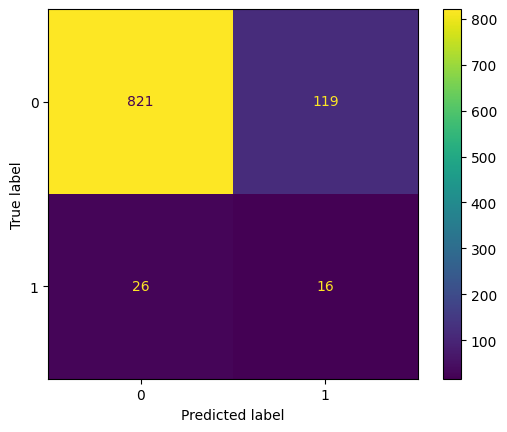

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = model.predict(x_test)

print("\nEVALUASI MODEL RANDOMFOREST")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


## Simpan Evaluasi JSON

In [ ]:
import json
from sklearn.metrics import confusion_matrix

evaluation_result = {
    "model": "XGBoost",
    "accuracy": accuracy_score(y_test, y_pred),
    "classification_report": classification_report(
        y_test,
        y_pred,
        output_dict=True
    ),
    "confusion_matrix": confusion_matrix(y_test, y_pred).tolist()
}

# Simpan ke file JSON
with open("forest.json", "w") as f:
    json.dump(evaluation_result, f, indent=4)

print("\nHasil evaluasi disimpan ke forest.json")


Hasil evaluasi disimpan ke forest.json


## Simpan Model

In [21]:

with open('models/random_forest.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

print("model dan scaler berhasil disimpan")

model dan scaler berhasil disimpan
